In [63]:
%pylab inline
from scipy.stats import norm, chisquare
import pandas as pd
import tweepy
import datetime
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import pareto, norm, chisquare
from scipy.special import gamma, gammainc

figsize(18, 6)


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [64]:
CONSUMER_KEY="HpvRdxSAri7T7NaQJ3UyB78Cb"
CONSUMER_SECRET="LBxZ4n1AThk0YMHk7c0C4NS44y1Y47eh8tjzXgpQcrd8mI6RLP"
ACCESS_TOKEN="3152137521-k5jRNoO76w7ZAXvHExOmjN8hvABa7SljE4D5NUD"
ACCESS_TOKEN_SECRET="RMbv9GvIKpcFgkCxNP0KuYt9fUF21EZ8lLrw7VXXVVtaQ"

def _get_twitter_api():
    """ Return api for twitter using tweepy """
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    return api

def get_tweets(screen_name, count=100, include_retweets=False):
    api = _get_twitter_api()
    cursor = tweepy.Cursor(api.user_timeline, id=screen_name, count=count)
    tweets = [tweet for tweet in cursor.items(count)]
    if include_retweets:
        return tweets 
    return [t for t in tweets if not hasattr(t, 'retweeted_status')]


In [46]:
kim = get_tweets('kimkardashian', 1000, True)
khloe = get_tweets('khloekardashian', 1000, True)           
    
kim_times = [t.created_at for t in kim]
khloe_times = [t.created_at for t in khloe]
    
kim_times.sort()
khloe_times.sort()

kim_timedeltas = [(kim_times[i+1]-kim_times[i]).total_seconds() 
                            for i in range(len(kim_times)-1)]
kim_min_timedeltas = [kim_timedeltas[i]/float(60) 
                            for i in range(len(kim_timedeltas))]

khloe_timedeltas = [(khloe_times[i+1]-khloe_times[i]).total_seconds() 
                            for i in range(len(khloe_times)-1)]
khloe_min_timedeltas = [khloe_timedeltas[i]/float(60) 
                            for i in range(len(khloe_timedeltas))]



In [ ]:
# This modification is used to get rid of extrememly long durations and this is what I am going to use as 'minute_mod'
# what I am going to use as 'minute_mod' in the following functions

_max = 90000/float(60)

kim_kardashian = [x for x in kim_min_timedeltas if 0 < x < _max]
khloe_kardashian =  [x for x in khloe_min_timedeltas if 0 < x < _max]

In [47]:
# These functions calculate the method of moments estimators for pareto, gamma,
# and the exponential distribution. beta, beta&alpha, and lamda respectively

def mom_beta(minute_mod): 
    return np.mean(minute_mod)/float(np.mean(minute_mod)-1)

def beta_gamma(minute_mod):
    N = len(minute_mod)
    minimum = min(minute_mod)    
    mean = np.mean(minute_mod)   
    return ((N*((N*mean-minimum)/float(N*mean-N*minimum))-1)*minimum)/(N*(
            (N*mean-minimum)/float(N*mean-N*minimum)))

def alpha_gamma(minute_mod):
    N = len(minute_mod)    
    minimum = min(minute_mod)    
    mean = np.mean(minute_mod) 
    return (N*mean-minimum)/float(N*mean-N*minimum)  

def mom_lam(minute_mod):
    mean = np.mean(minute_mod)
    return len(minute_mod)/float(mean)

In [48]:
# These functions evaluate the pdf of the given distribution for a given 
# array of durations and X values

def Pareto(minute_mod,X):
    minimum = min(minute_mod)
    return ((X**(mom_beta(minute_mod)+1))**(-1))*(mom_beta(minute_mod)*(
            minimum**mom_beta(minute_mod)))
     
def Gamma(minute_mod,X):
    return (beta_gamma(minute_mod)**alpha_gamma(minute_mod))*(X**(alpha_gamma(
            minute_mod)-1))*(exp(-X*beta_gamma(minute_mod)))/float(gamma(
            alpha_gamma(minute_mod)))

def Exponential(minute_mod,X):
    mean = np.mean(minute_mod)
    lam = len(minute_mod)/float(mean)   
    return lam*exp(-lam*X)


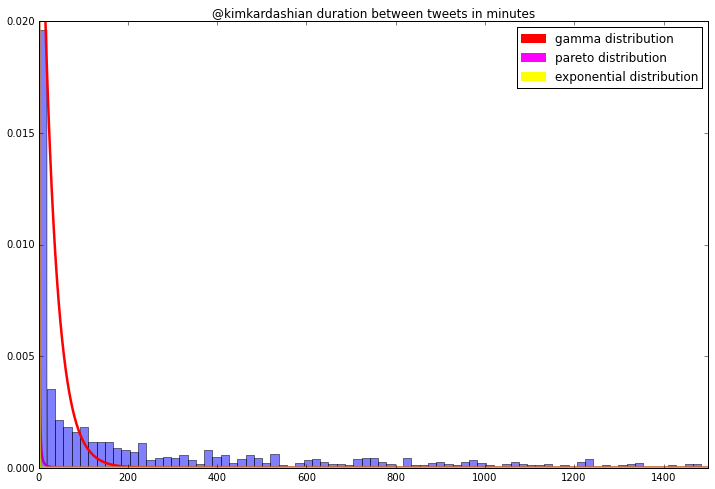

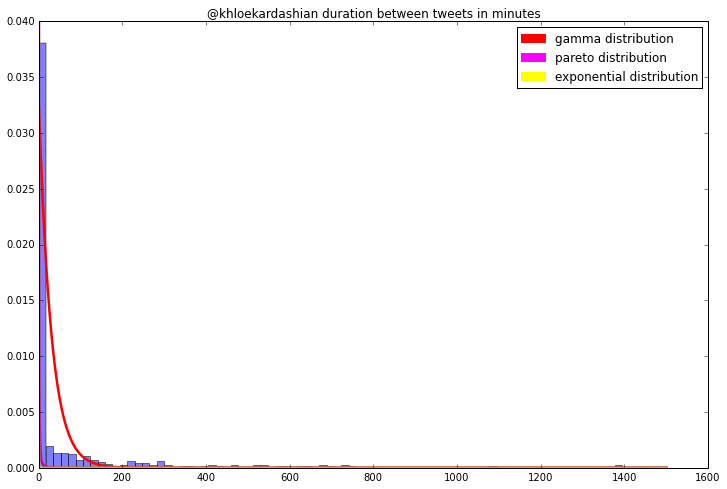

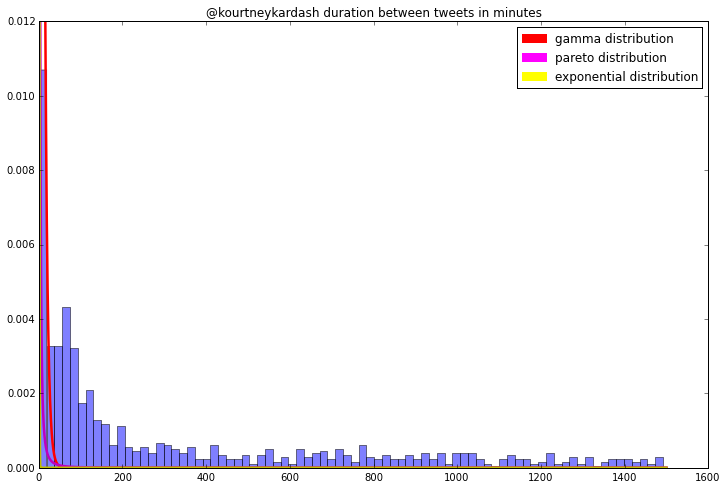

In [49]:
figsize(12,8)
plt.hist(kim_kardashian, bins=80, normed = True, alpha = 0.5)
X = np.linspace(0, _max, 10000)
plt.title('@kimkardashian duration between tweets in minutes')
plt.plot(X, Gamma(kim_kardashian,X), 'r-', lw=2.5)
plt.plot(X, Pareto(kim_kardashian,X), 'm-', lw=2.5)
plt.plot(X, Exponential(kim_kardashian,X), 'y-', lw=2.5)
red_patch = mpatches.Patch(color='red', label='gamma distribution')
magenta_patch = mpatches.Patch(color='magenta', label='pareto distribution')
yellow_patch = mpatches.Patch(color='yellow', label='exponential distribution')
plt.legend(handles=[red_patch, magenta_patch, yellow_patch])
pylab.ylim([0,.02])
pylab.xlim([0,1500])
plt.show()

figsize(12,8)
plt.hist(khloe_kardashian, bins=80, normed = True, alpha = 0.5)
X = np.linspace(0, _max, 10000)
plt.title('@khloekardashian duration between tweets in minutes')
plt.plot(X, Gamma(khloe_kardashian,X), 'r-', lw=2.5)
plt.plot(X, Pareto(khloe_kardashian,X), 'm-', lw=2.5)
plt.plot(X, Exponential(khloe_kardashian,X), 'y-', lw=2.5)
red_patch = mpatches.Patch(color='red', label='gamma distribution')
magenta_patch = mpatches.Patch(color='magenta', label='pareto distribution')
yellow_patch = mpatches.Patch(color='yellow', label='exponential distribution')
plt.legend(handles=[red_patch, magenta_patch, yellow_patch])
pylab.ylim([0,.04])
plt.show()

figsize(12,8)
plt.hist(kourtney_kardash, bins=80, normed = True, alpha = 0.5)
X = np.linspace(0, _max, 10000)
plt.title('@kourtneykardash duration between tweets in minutes')
plt.plot(X, Gamma(kourtney_kardash,X), 'r-', lw=2.5)
plt.plot(X, Pareto(kourtney_kardash,X), 'm-', lw=2.5)
plt.plot(X, Exponential(kourtney_kardash,X), 'y-', lw=2.5)
red_patch = mpatches.Patch(color='red', label='gamma distribution')
magenta_patch = mpatches.Patch(color='magenta', label='pareto distribution')
yellow_patch = mpatches.Patch(color='yellow', label='exponential distribution')
plt.legend(handles=[red_patch, magenta_patch, yellow_patch])
pylab.ylim([0,.012])
plt.show()


##Visually it does not look like any of these distributions are appropriate

In [51]:
Chi_Squared_Test_pareto(kim_kardashian)

The test statistic is: 1438528.93863
The chi-square, with 36 degrees of freedom p-value is 0.00000


In [52]:
Chi_Squared_Test_pareto(khloe_kardashian)

The test statistic is: 364644.92125
The chi-square, with 36 degrees of freedom p-value is 0.00000


###We reject $H_0$ and accept $H_1$; this is not likely an pareto distribution

In [54]:
Chi_Squared_Test_exponential(kim_kardashian)

The test statistic is: 1053.71099
The chi-square, with 37 degrees of freedom p-value is 0.00000


In [55]:
Chi_Squared_Test_exponential(khloe_kardashian)

The test statistic is: 39039.51263
The chi-square, with 37 degrees of freedom p-value is 0.00000


###We reject $H_0$ and accept $H_1$; this is not likely an exponential distribution

In [57]:
Chi_Squared_Test_gamma(kim_kardashian)

The test statistic is: 99994.50539
The p-value is 0.00000


In [58]:
Chi_Squared_Test_gamma(khloe_kardashian)

The test statistic is: 24612.50767
The p-value is 0.00000


###We reject $H_0$ and accept $H_1$; this is not likely an gamma distribution

####Lets try exculding tweet durations greater than 20 minutes and shorter than 8 hours (480 minutes)

In [60]:
_max = 480
_min = 20

kimkardashian_mod = [x for x in kim_min_timedeltas if _min < x < _max]
khloekardashian_mod =  [x for x in khloe_min_timedeltas if _min < x < _max]
kourtneykardash_mod = [x for x in kourt_min_timedeltas if _min < x < _max]


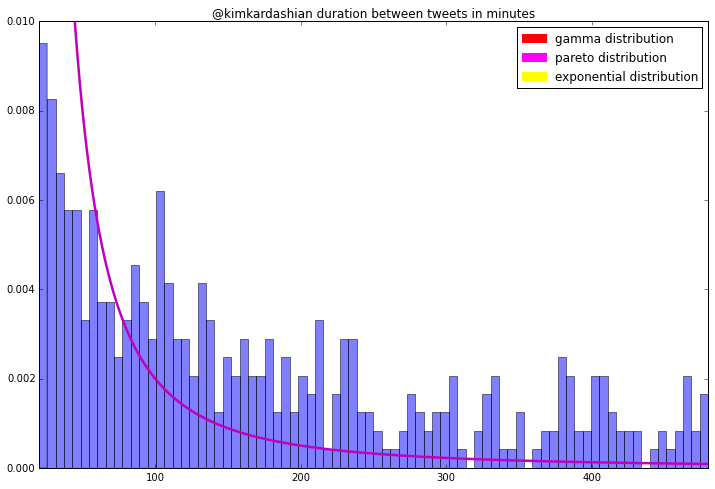

In [61]:
figsize(12,8)
plt.hist(kimkardashian_mod, bins=80, normed = True, alpha = 0.5)
X = np.linspace(_min, _max, 10000)
plt.title('@kimkardashian duration between tweets in minutes')
plt.plot(X, Pareto(kimkardashian_mod,X), 'm-', lw=2.5)
magenta_patch = mpatches.Patch(color='magenta', label='pareto distribution')
plt.legend(handles=[red_patch, magenta_patch, yellow_patch])
pylab.ylim([0,.01])
pylab.xlim([_min,_max])
plt.show()

####Still doesn't look to fit

In [62]:
Chi_Squared_Test_pareto(kimkardashian_mod)

The test statistic is: 1092.23328
The chi-square, with 36 degrees of freedom p-value is 0.00000


###We reject $H_0$ and accept $H_1$; this is not likely an pareto distribution